1. Kütüphanelerin ve Datanın Yüklenmesi

In [345]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-recruiting-new-user-bookings/sessions.csv.zip
/kaggle/input/airbnb-recruiting-new-user-bookings/sample_submission_NDF.csv.zip
/kaggle/input/airbnb-recruiting-new-user-bookings/age_gender_bkts.csv.zip
/kaggle/input/airbnb-recruiting-new-user-bookings/countries.csv.zip
/kaggle/input/airbnb-recruiting-new-user-bookings/train_users_2.csv.zip
/kaggle/input/airbnb-recruiting-new-user-bookings/test_users.csv.zip


In [346]:
train=pd.read_csv('../input/airbnb-recruiting-new-user-bookings/train_users_2.csv.zip')
test = pd.read_csv('../input/airbnb-recruiting-new-user-bookings/test_users.csv.zip')
#sessions=pd.read_csv('../input/airbnb-recruiting-new-user-bookings/sessions.csv.zip')
#countries=pd.read_csv('../input/airbnb-recruiting-new-user-bookings/countries.csv.zip')
#age_gender=pd.read_csv('../input/airbnb-recruiting-new-user-bookings/age_gender_bkts.csv.zip')

In [347]:
Id = 'id' # Submission'da kullanmak üzere id kısmını değişkene atayarak datamdan sileceğm.

mysubmission_ID = test.loc[:,Id]

train.drop(Id, axis=1, inplace=True)
test.drop(Id, axis=1, inplace=True)

# Test ve Train datasını işaretleyebilmek için Train kolonu oluşturdum.
train.loc[:,'Train'] = 1
test.loc[:,'Train'] = 0

# Tek bir df üzerinden gitmek için birleştiriyorum.

df = pd.concat([train,test], ignore_index=True)


2. Datayı Anlama

In [348]:
train.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination,Train
0,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF,1
1,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF,1
2,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US,1
3,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other,1
4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US,1


In [349]:
test.head()

,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,Train
0,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,0
1,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari,0
2,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome,0
3,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE,0
4,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari,0


In [350]:
df.info() # Boş değeri olan sütunları belirlemek ve data tiplerini anlamak için info'ya bakıyorum. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date_account_created     275547 non-null  object 
 1   timestamp_first_active   275547 non-null  int64  
 2   date_first_booking       88908 non-null   object 
 3   gender                   275547 non-null  object 
 4   age                      158681 non-null  float64
 5   signup_method            275547 non-null  object 
 6   signup_flow              275547 non-null  int64  
 7   language                 275547 non-null  object 
 8   affiliate_channel        275547 non-null  object 
 9   affiliate_provider       275547 non-null  object 
 10  first_affiliate_tracked  269462 non-null  object 
 11  signup_app               275547 non-null  object 
 12  first_device_type        275547 non-null  object 
 13  first_browser            275547 non-null  object 
 14  coun

Date_first_booking =NaN olanlar Country_destination'da "NDF" olan kişiler ile aynı. Bu da airbnb'ye kayıt olup, henüz herhangi bir yere gitmeyenleri gösteriyor. Test datasında da bu değerler boş; amaç test datasındaki kişilerin gidecekleri ilk yer bulmak olduğu için bu da beklenebilecek bir durum. Dolayısı ile aslında modelde "Date_first_booking" kolonunu kullanmak anlamlı değil. Yapılabilecek bir şey, sadece bir yere gidenler üzerinden model kurmak. Herhangi başka bir şeyi değiştirmeden, bir de "NDF" olanları çıkarmadan aynı modeli çalıştırarak sonucun nasıl değiştiği gözlemlenebilir. Ayrıca data_first_booking kullanılabilecek bir feature haline getirilerek de model kurulabilir. Örn; uygulamada aktif olduğu tarih ile ilk booking'ini yaptığı tarih arasında benzerlik olan kişiler benzer davranışlar gösteriyor mu? sorusunun cevabı aranabilir.

date_first_booking haricinde, age ve first_affiliate_tracked kolonlarında eksik data görülüyor. Diğer sütunların unique değerlerine baktığımızda, gender'da da "unknown" girilen, eksik veri olarak değerlendirilebileceğimiz data olduğunu görebiliriz.

In [351]:
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date_account_created     213451 non-null  object 
 1   timestamp_first_active   213451 non-null  int64  
 2   date_first_booking       88908 non-null   object 
 3   gender                   213451 non-null  object 
 4   age                      125461 non-null  float64
 5   signup_method            213451 non-null  object 
 6   signup_flow              213451 non-null  int64  
 7   language                 213451 non-null  object 
 8   affiliate_channel        213451 non-null  object 
 9   affiliate_provider       213451 non-null  object 
 10  first_affiliate_tracked  207386 non-null  object 
 11  signup_app               213451 non-null  object 
 12  first_device_type        213451 non-null  object 
 13  first_browser            213451 non-null  object 
 14  coun

In [352]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date_account_created     62096 non-null  object 
 1   timestamp_first_active   62096 non-null  int64  
 2   date_first_booking       0 non-null      float64
 3   gender                   62096 non-null  object 
 4   age                      33220 non-null  float64
 5   signup_method            62096 non-null  object 
 6   signup_flow              62096 non-null  int64  
 7   language                 62096 non-null  object 
 8   affiliate_channel        62096 non-null  object 
 9   affiliate_provider       62096 non-null  object 
 10  first_affiliate_tracked  62076 non-null  object 
 11  signup_app               62096 non-null  object 
 12  first_device_type        62096 non-null  object 
 13  first_browser            62096 non-null  object 
 14  Train                 

In [353]:
train.describe()

,timestamp_first_active,age,signup_flow,Train
count,2.134510e+05,125461.000000,213451.000000,213451.0
mean,2.013085e+13,49.668335,3.267387,1.0
std,9.253717e+09,155.666612,7.637707,0.0
min,2.009032e+13,1.000000,0.000000,1.0
25%,2.012123e+13,28.000000,0.000000,1.0
50%,2.013091e+13,34.000000,0.000000,1.0
75%,2.014031e+13,43.000000,0.000000,1.0
max,2.014063e+13,2014.000000,25.000000,1.0


 Yaş datasında hatalı girişler olduğunu gördüm. Max=2014 ve min=1 idi. Yaş datasını gidilen ülke ve cinsiyet ile ilişkilendirebilir miyim diye baktım. Fark yaratan bir şey yoktu. Airbnb'in kurallarına göre 18 yaşından küçük kişiler airbnb aracılığı ile bir yerde konaklayamaz. Bu nedenle 18 yaşından küçük olup, bir yere gitmeyen kişileri datadan kaldırdım. Bir yere giden kişilerin yaşını ise 18'e getirdim.

4 basamaklı girilen yaşların yanısıra 100-116 arasında yaşlar da vardı. Train datasında 105 yaşında bariz bir fazlalık olduğunu gördüm. Eğer boş değer olmasaydı, yaş girmeyenleri sistem otomatik 2015-1910 gibi sabit bir değerle doldurmuş diye düşünecektim. Yaş değerli bir bilgi olacağı için outlier yaratabilecek bu değerleri kaldırdım. Bir sonraki aşamada bu yaş civarında olanların ortak bir özelliği var mı diye bakmayı planlıyorum.

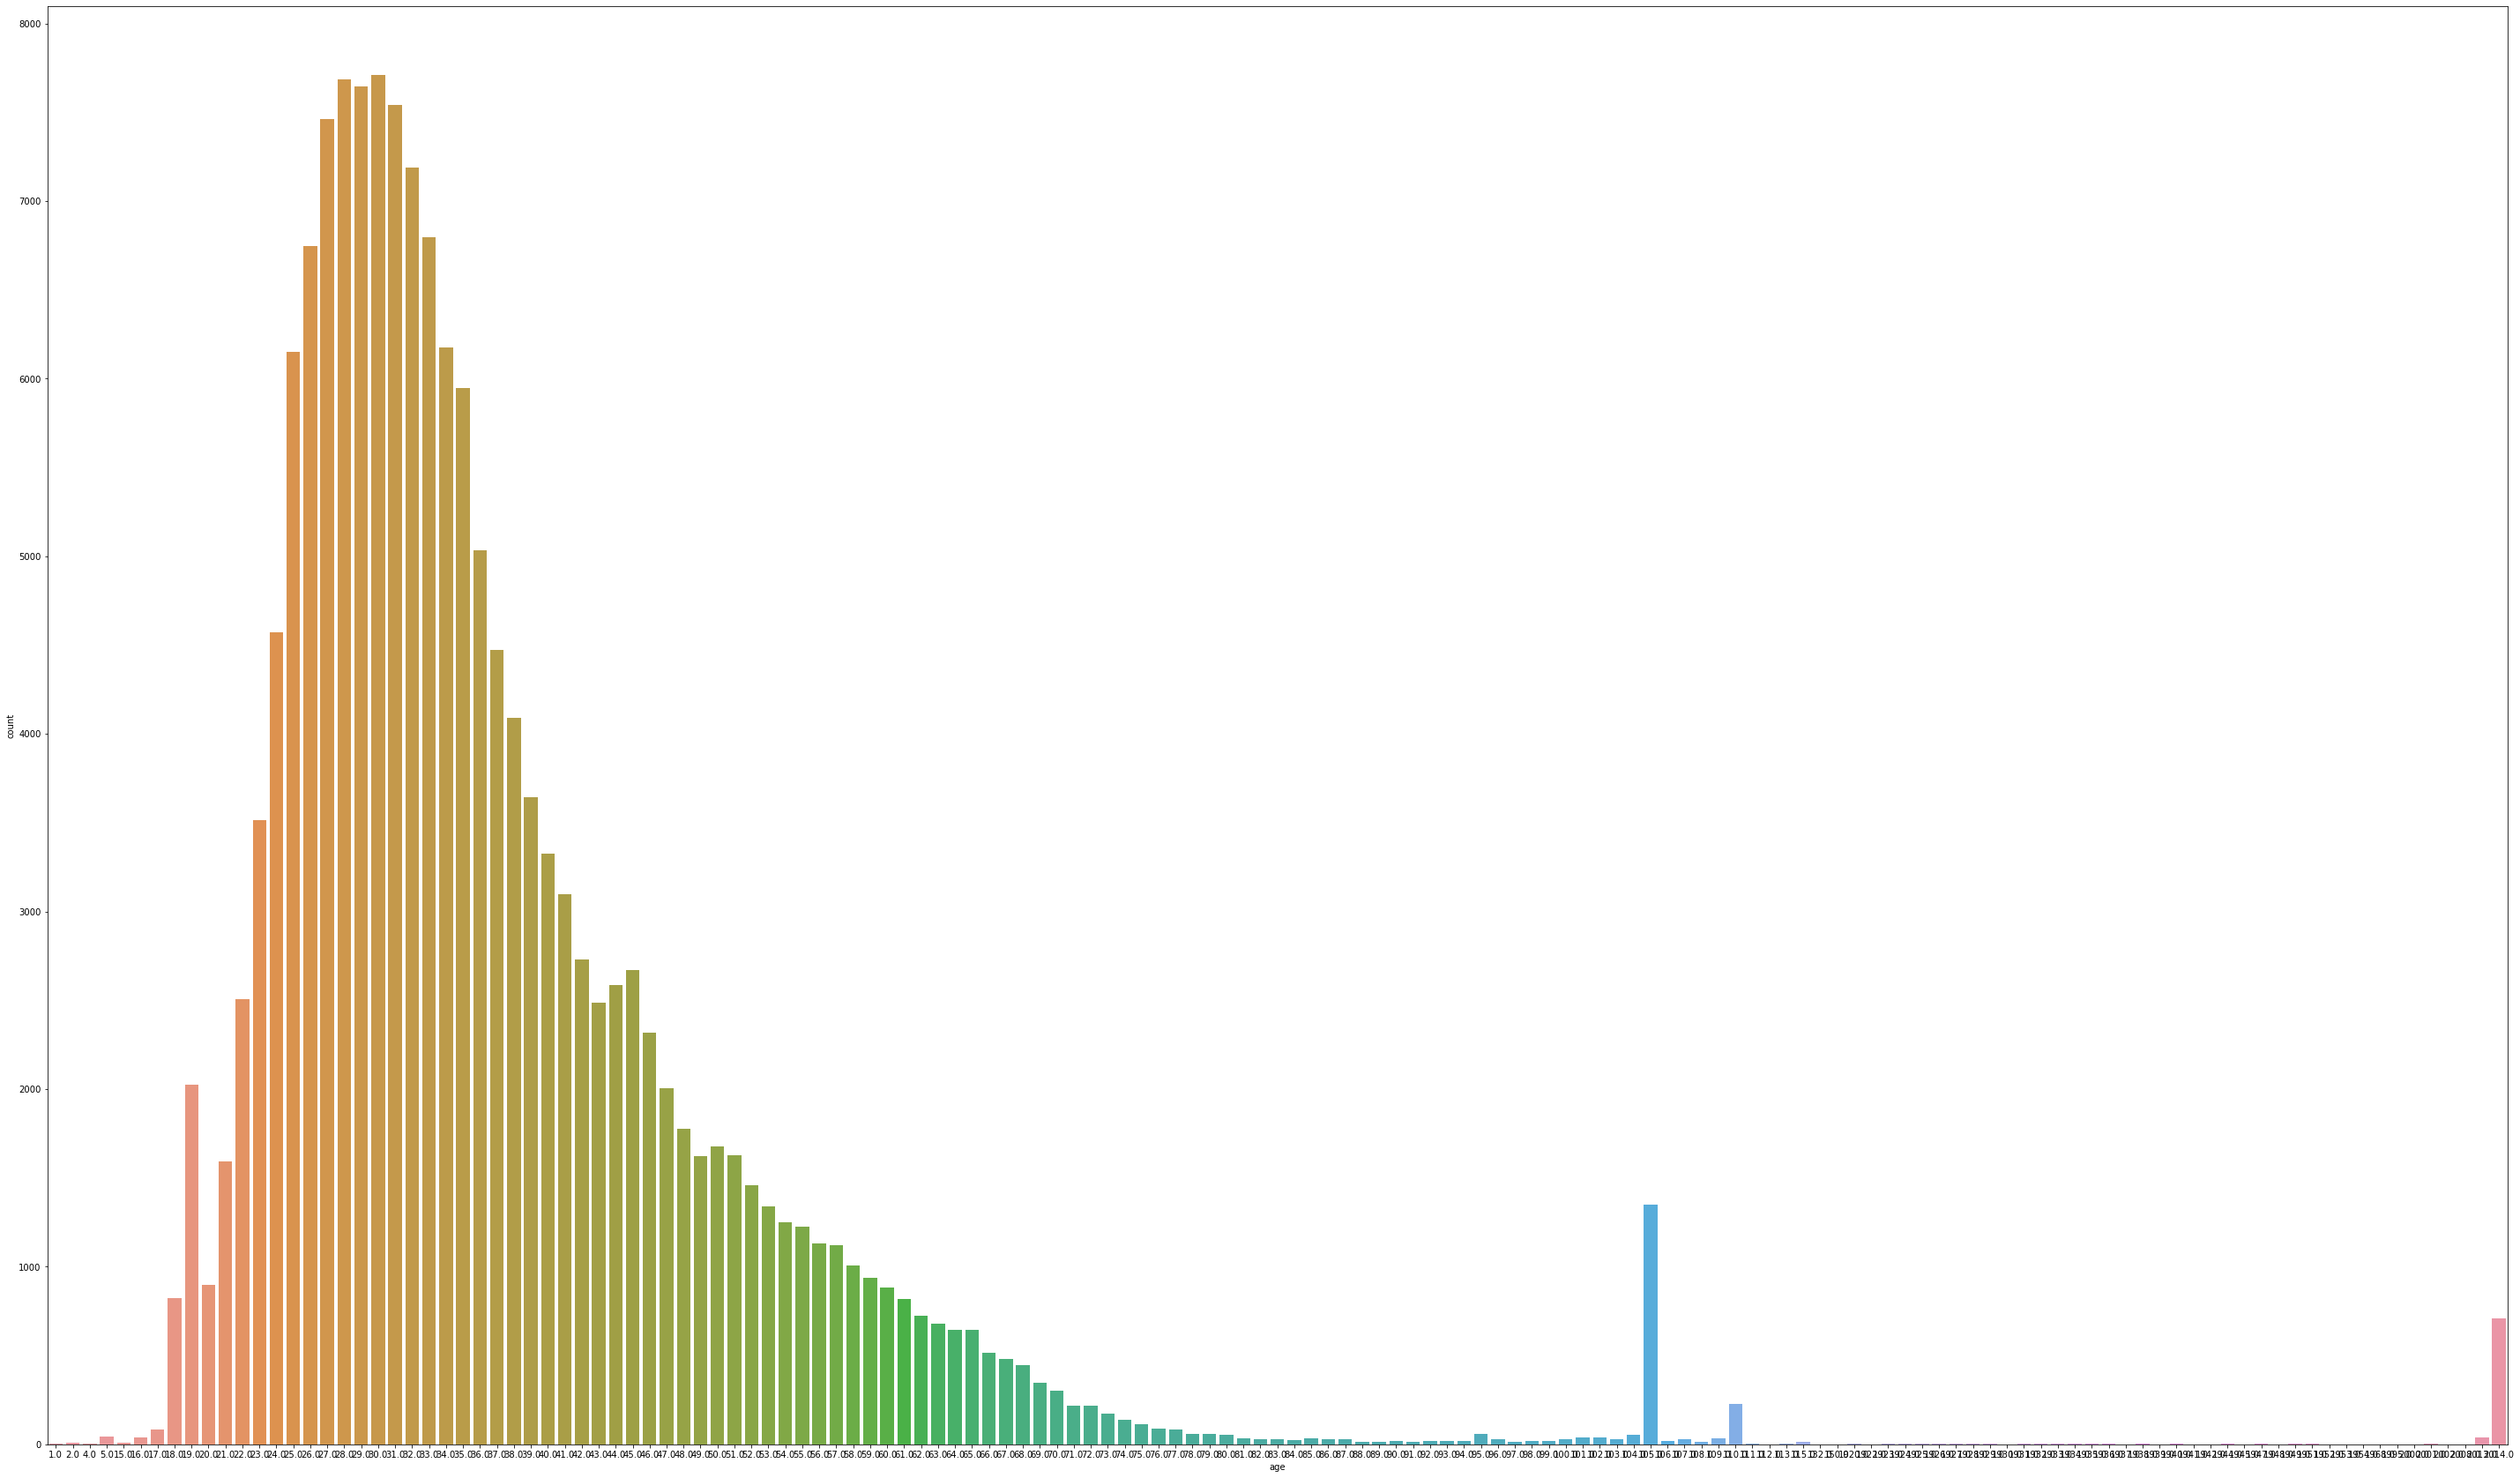

In [354]:
plt.figure(figsize=(50,30))
sns.countplot(x='age', data=df)

1000 - 1996 arasında olan yaş değerlerinde kişilerin doğum tarihlerini yaş olarak girdiğini kabul ettim. 2014 yılına ait daha fazla değer olduğu için 2014 yılında 18 yaşında olmayı seyahat şartı gibi aldım.18 yaşından küçük olup bir yere gitmemiş olan 136 kişiyi datadan çıkardım.

In [355]:
dft=df[df['Train']==1]
a=dft[(dft['age']<=17) & (dft['country_destination']=='NDF')].sort_values(by=['age']).index

In [356]:
df.drop(a,inplace=True)

In [357]:
df.loc[df['age']<=17, 'age']=18 #test datasında da en küçük yaş =18 oluyor bu kod ile

1000 - 1996 arasında olan yaş değerlerinde kişilerin doğum tarihlerini yaş olarak girdiğini kabul ettim. 2014 yılına ait daha fazla değer olduğu için 2014 yılında 18 yaşında olmayı seyahat şartı gibi aldım.

In [358]:
def ageconverter(age):
    if (age<1997) & (age>1000):
        return (2014-age)
    else:
        return age

In [359]:
df.describe()

,timestamp_first_active,age,signup_flow,Train
count,2.754110e+05,158545.000000,275411.000000,275411.000000
mean,2.013310e+13,47.176574,4.292508,0.774533
std,9.139515e+09,142.686540,8.795383,0.417890
min,2.009032e+13,18.000000,0.000000,0.000000
25%,2.013040e+13,28.000000,0.000000,1.000000
50%,2.014010e+13,33.000000,0.000000,1.000000
75%,2.014062e+13,42.000000,1.000000,1.000000
max,2.014093e+13,2014.000000,25.000000,1.000000


In [360]:
df['aged'] =df['age'].apply(ageconverter)
df.drop('age', inplace=True, axis=1)

In [361]:
df.drop(df[(df['country_destination']=='NDF') & (df['aged']>=1000)].index, inplace=True) #2001-2014 yaş arasındakilerden NDF olanları datadan sildim, 
                                                                                            #diğerlerini nan ile doldurdum.

In [362]:
df.loc[df['aged']>=1000, 'aged']=np.nan

In [363]:
df['aged'].describe() #hala yaşı mükün olmayacak byüklükte olan kişiler vardı

count    157788.000000
mean         36.905722
std          13.844369
min          18.000000
25%          28.000000
50%          33.000000
75%          42.000000
max         150.000000
Name: aged, dtype: float64

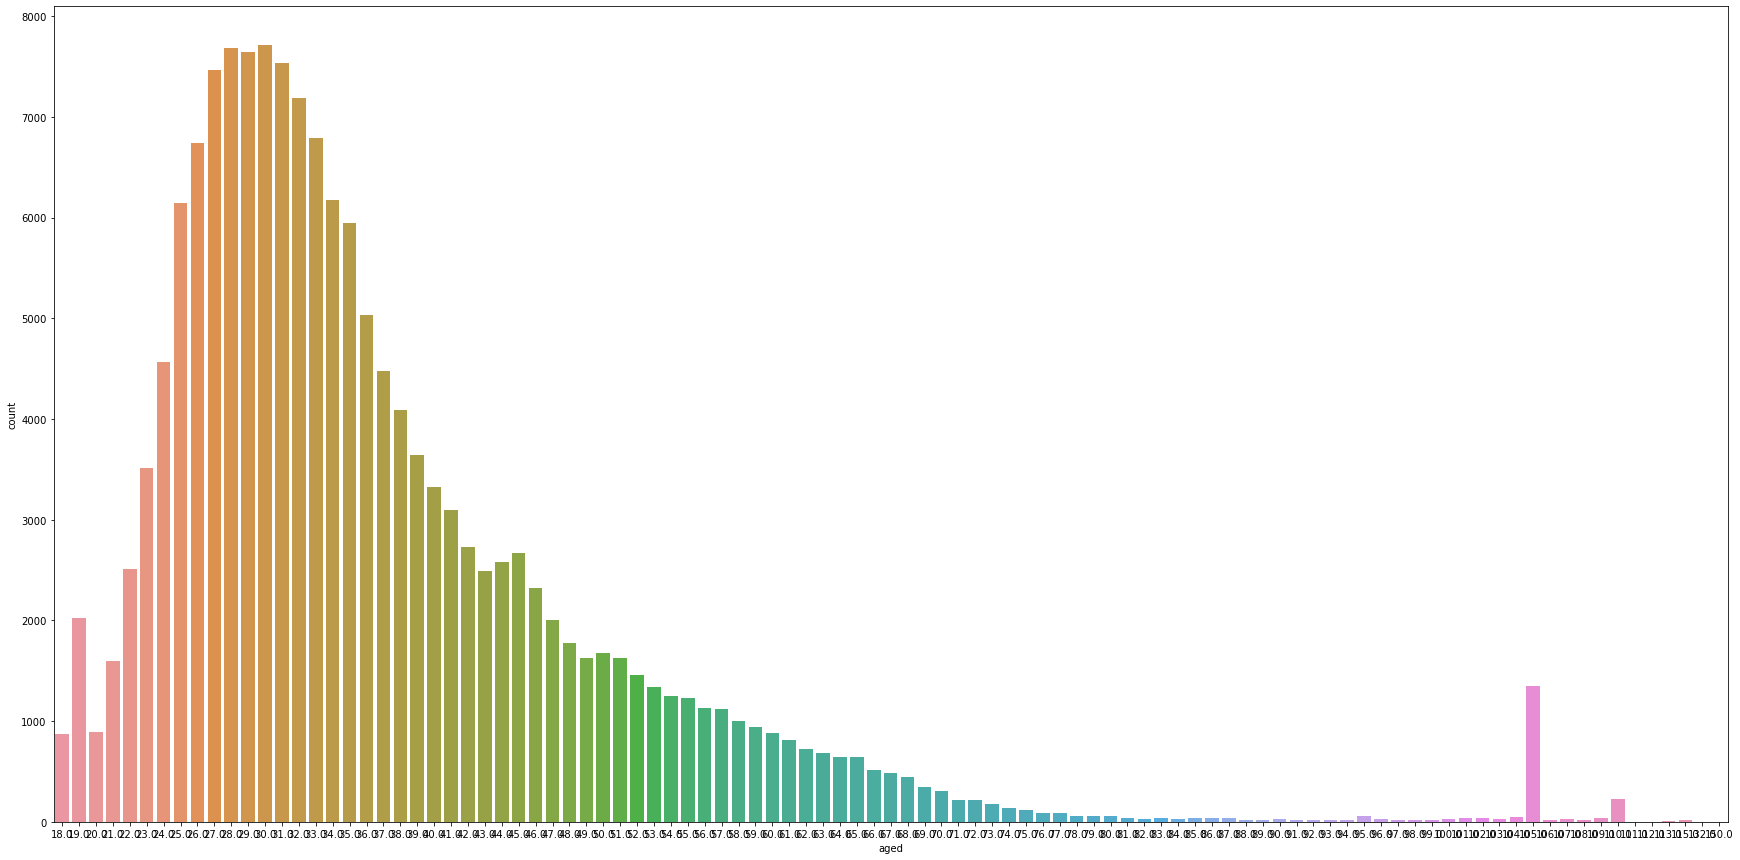

In [364]:
plt.figure(figsize=(30,15))
sns.countplot(x='aged', data=df)

In [365]:
df.loc[df['aged']>=85, 'aged']=np.nan #grafiğe bakınca 85'ten sonrasını almamaya karar verdim, onları da NaN ile doldurdum.

Yaşta hala NaN değerlerim vardı,cinsiyet ile ilişkisi var mı diye baktım. Sadece train datasına bakmak için dft diye bir df tanımladım. Buna göre

In [366]:
dft=df[df['Train']==1]

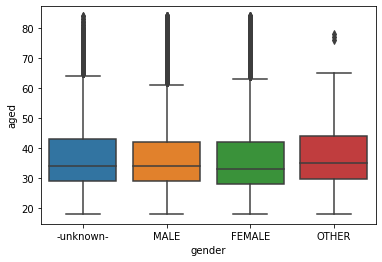

In [367]:
sns.boxplot(x='gender', y='aged', data =df[df['Train']==1]) # Yaş 'missing' değerlerini ne ile doldurabilirim diye çeşitli featurelara baktım

In [368]:
dft.groupby('affiliate_channel')['aged'].mean()

affiliate_channel
api              32.873206
content          41.210241
direct           35.689311
other            36.501630
remarketing      39.572148
sem-brand        38.943595
sem-non-brand    40.100326
seo              34.821931
Name: aged, dtype: float64

En fark edilir değişiklik "affiliate_channel"a göre idi, ona göre doldurdum.

In [369]:
def agefiller(param):
    age = param[0]
    ac = param[1]
    if pd.isnull(age)==True:
        if ac == 'api':
            return 33
        elif ac== 'content':
            return 41
        elif ac== 'direct':
            return 36
        elif ac=='other':
            return 37
        elif ac== 'remarketing':
            return 40
        elif ac== 'sem-brand':
            return 39
        elif ac== 'sem-non-brand':
            return 40
        elif ac== 'seo':
            return 35
    else:
        return param[0]
    
    
        

In [370]:
df['aged'] =df[['aged', 'affiliate_channel']].apply(agefiller, axis=1)

In [371]:
df['aged']=df['aged'].astype(int) # daha okunur olması için integer'a çevirdim

Bir diğer missing data da "'first_affiliate_tracked" özelliğinde idi.

In [372]:
dft=df[df['Train']==1]
dft.pivot_table(values='gender',index='affiliate_channel', columns='first_affiliate_tracked',aggfunc='count')

first_affiliate_tracked,linked,local ops,marketing,omg,product,tracked-other,untracked
affiliate_channel,,,,,,,
api,990.0,NaN,5.0,531.0,22.0,141.0,6044.0
content,226.0,10.0,NaN,3182.0,4.0,37.0,307.0
direct,32943.0,3.0,25.0,6161.0,1353.0,1704.0,91710.0
other,1644.0,19.0,98.0,660.0,21.0,3430.0,2442.0
remarketing,202.0,NaN,1.0,456.0,NaN,43.0,354.0
sem-brand,2651.0,NaN,3.0,18931.0,24.0,366.0,3744.0
sem-non-brand,1640.0,2.0,6.0,13598.0,17.0,300.0,2422.0
seo,5875.0,NaN,1.0,348.0,105.0,118.0,1989.0


affiliate_channel'a göre bakınca, NaN değerleri doldururken seo ise linked, omg ise sem-non-brand, diğerlerini de 'untracked' olarak doldurmaya kadar verdim.

In [373]:
def fatfiller(param):
    fat= param[0]
    ac = param[1]
    if pd.isnull(fat)==True:
        if ac == 'seo':
            return 'linked'
        elif ac== 'sem-non-brand':
            return 'omg'
        else:
            return 'untracked'
    else:
        return param[0]

In [374]:
df['first_affiliate_tracked'] =df[['first_affiliate_tracked', 'affiliate_channel']].apply(fatfiller, axis=1)

Bir de boş görünmese de içindeki verilere bakınca first_browser'da da unknown değerler olduğunu gördüm.

In [375]:
df['first_browser'].replace('-unknown-',np.nan,inplace=True)

In [376]:
dft.pivot_table(values='language',index='first_browser', columns='first_device_type',aggfunc='count')

first_device_type,Android Phone,Android Tablet,Desktop (Other),Mac Desktop,Other/Unknown,SmartPhone (Other),Windows Desktop,iPad,iPhone
first_browser,,,,,,,,,
-unknown-,1324.0,108.0,10.0,5.0,10509.0,NaN,10.0,882.0,14345.0
AOL Explorer,NaN,NaN,NaN,NaN,NaN,NaN,241.0,NaN,NaN
Android Browser,748.0,44.0,NaN,NaN,54.0,NaN,NaN,NaN,NaN
Apple Mail,NaN,NaN,NaN,35.0,1.0,NaN,NaN,NaN,NaN
Arora,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Avant Browser,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
BlackBerry Browser,NaN,13.0,NaN,NaN,NaN,39.0,NaN,NaN,NaN
Camino,NaN,NaN,NaN,9.0,NaN,NaN,NaN,NaN,NaN
Chrome,NaN,57.0,718.0,28166.0,37.0,NaN,34720.0,NaN,NaN


first_browser'ın first_device_type ile ilişkisine baktığımda ayırtedici farklar vardı, datamı buna göre dolduracağım bir fonksiyon yazdım.

In [377]:
def fbfiller(param):
    fb= param[0]
    fdt = param[1]
    if pd.isnull(fb)==True:
        if fdt == 'Android Phone':
            return 'Android Browser'
        elif fdt =='Android Tablet':
            return 'IE'
        elif fdt =='SmartPhone (Other)':
            return 'BlackBerry Browser'
        elif fdt =='iPad':
            return 'Mobile Safari'
        elif fdt =='iPhone':
            return 'Mobile Safari'
        elif fdt =='Mac Desktop':
            return 'Safari'
        else:
            return 'Chrome'
    else:
        return param[0]

In [378]:
df['first_browser'] =df[['first_browser', 'first_device_type']].apply(fbfiller, axis=1) # fonksiyona göre datamı doldurdum.

3. EDA 

Kişilerin ilk aktif olduğu tarihlere göre akışa bakmak istedim.

In [379]:
from datetime import datetime

In [380]:
first_active_date =[]
for i in df['timestamp_first_active']:
    d = datetime.strptime(str(i),'%Y%m%d%H%M%S')
    day_string = d.strftime('%Y-%m-%d')
    first_active_date.append(day_string)

In [381]:
first_active_time =[]
for i in df['timestamp_first_active']:
    d = datetime.strptime(str(i),'%Y%m%d%H%M%S')
    time_string = d.strftime('%H:%M:%S')
    first_active_time.append(time_string)
    

In [382]:
df['first_active_date']=first_active_date
df['first_active_time']=first_active_time
df=df.drop(['timestamp_first_active'], axis=1)

In [383]:
fad = np.vstack(df['first_active_date'].astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
df['fad_year'] = fad[:, 0]
df['fad_month'] = fad[:, 1]
df['fad_day'] = fad[:, 2]
df = df.drop(['first_active_date'], axis=1)

In [384]:
fad = np.vstack(df['first_active_time'].astype(str).apply(lambda x: list(map(int, x.split(':')))).values)
df['fad_hour'] = fad[:, 0]
df = df.drop(['first_active_time'], axis=1)

In [385]:
dft=df[df['Train']==1]

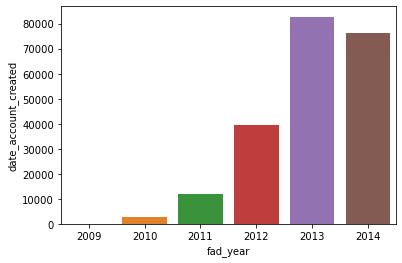

In [386]:
year_counts = dft.groupby('fad_year').count()['date_account_created'].to_frame().reset_index()
ax = sns.barplot(x = 'fad_year' , y='date_account_created', data = year_counts)

2013'te uygulamayı keşfeden ve giriş yapan daha fazla gibi görünüyor.

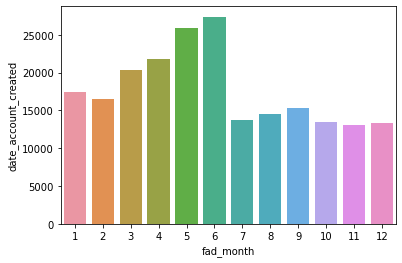

In [387]:
month_counts = dft.groupby('fad_month').count()['date_account_created'].to_frame().reset_index()
bx = sns.barplot(x = 'fad_month' , y='date_account_created', data = month_counts)

Genellikle ilk 6 ayda daha fazla kullanılmış

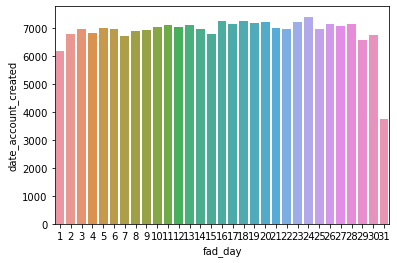

In [388]:
day_counts = dft.groupby('fad_day').count()['date_account_created'].to_frame().reset_index()
cx = sns.barplot(x = 'fad_day' , y='date_account_created', data = day_counts)

Ayın son gününde daha az bir kullanım görünüyor. Bunun nedeni olarak aklıma ilk her ayın 31 günü olmaması geldi.

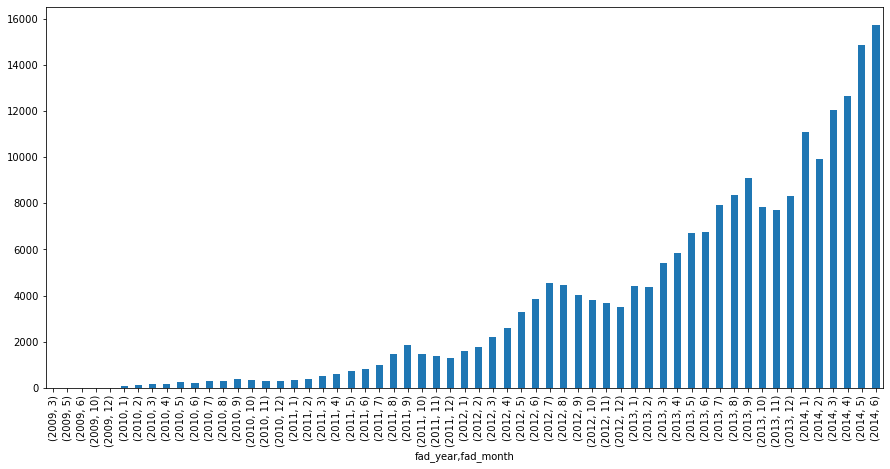

In [389]:
plt.figure(figsize=(15,7))
dft.groupby(['fad_year','fad_month']).count()['date_account_created'].plot.bar()

airbnb'nin popülerleşmesi ile kullanımda artan bir trend var.

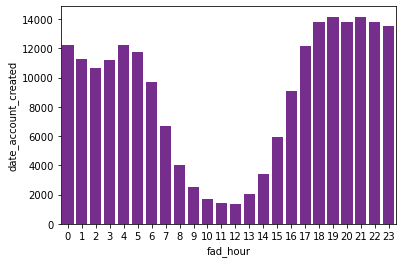

In [390]:
hour_nums = dft.groupby(['fad_hour']).count()['date_account_created'].to_frame().reset_index()
dx = sns.barplot(x = 'fad_hour' , y="date_account_created", data = hour_nums, color=sns.xkcd_rgb["purple"])

Saat olarak öğlen uygulamada daha az aktif kişi görünüyor. Bunun nedeni insanların öğle aralarını kendilerine ayırmış (yemek yemek) olmaları olabilir.

train.dropna(subset =['date_first_booking'],inplace=True)
dfb = np.vstack(train['date_first_booking'].astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
train['dfb_year'] = dfb[:, 0]
train['dfb_month'] = dfb[:, 1]
train['dfb_day'] = dfb[:, 2]
train = train.drop(['date_first_booking'], axis=1)

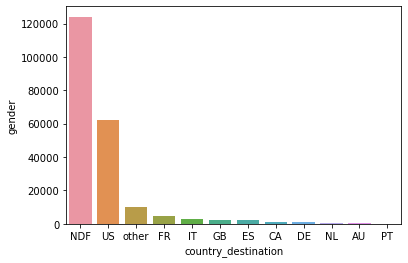

In [391]:
dest_nums =  dft.groupby('country_destination').count()['gender'].sort_values(ascending = False).to_frame().reset_index()
hx = sns.barplot(x = 'country_destination' , y="gender", data = dest_nums)

In [392]:
dac = np.vstack(df['date_account_created'].astype(str).apply(lambda x: list(map(int, x.split('-')))).values)
df['dac_year'] = dac[:, 0]
df['dac_month'] = dac[:, 1]
df['dac_day'] = dac[:, 2]
df = df.drop(['date_account_created'], axis=1)

In [393]:
dft=df[df['Train']==1]

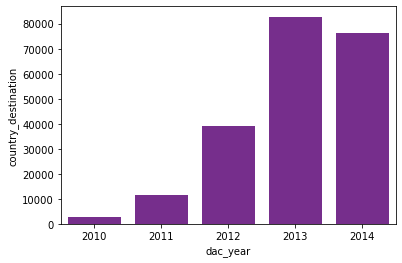

In [394]:
dac_year = dft.groupby(['dac_year']).count()['country_destination'].to_frame().reset_index()
dx = sns.barplot(x = 'dac_year' , y="country_destination", data = dac_year, color=sns.xkcd_rgb["purple"])

Gender datasında bilmediğimiz çok data var -unknown- olarak. Cinsiyeti önemli bir feature olarak düşündüğüm için bunu nasıl dolduracağıma baktım.

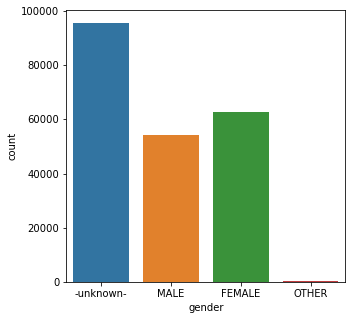

In [396]:
fig=plt.figure(figsize=(5,5))
sns.countplot(x='gender', data=dft)

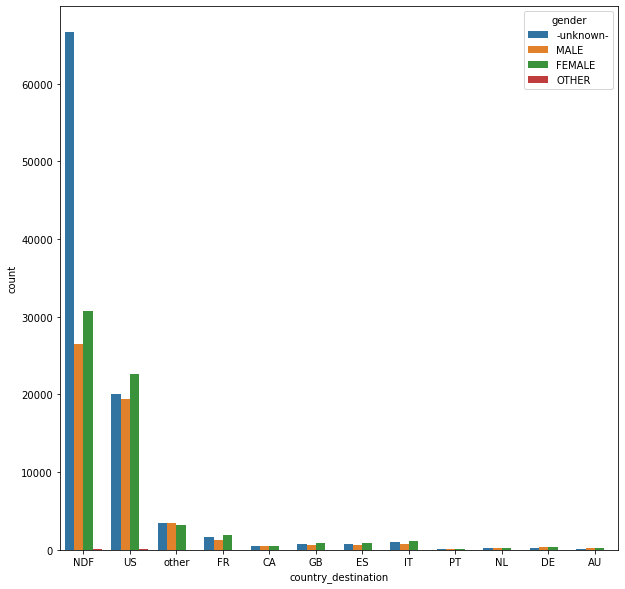

In [397]:
fig=plt.figure(figsize=(10,10))
sns.countplot(x='country_destination', data=dft, hue ='gender')

Herhangi bir özelliğin seçenekleri ile cinsiyetin belirgin bir ilişkisini göremedim. 
Bu nedenle modelimde -unkonwn- olarak bıraktım. Daha önce knnimputer da denedim ama sonuçlarımı çok etkilemedi.